In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torchio as tio
import sys
from PIL import Image
import os

sys.path.insert(0, '../../scripts/')

from helpers import miscellaneous as m
from helpers import plotters as p
from helpers import preprocessing2d as prep
CONFIG = m.get_config()

In [66]:
def loop_images(img_path:str = None, substring: str = None):
    """
    Generator that yields next image in folder after every call
    :param folder:
    :param substring:
    :return:
    """
    img_list = os.listdir(img_path)

    if substring:
        img_list = [img for img in img_list if substring in str(img)]

    for image in img_list:
        img = tio.ScalarImage(img_path + image)
        yield img

In [67]:
images = loop_images(img_path='../../data/raw/flattened/')

### Example image

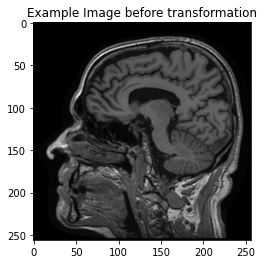

In [68]:
test_img_processed = next(images).data.float()
plt.title('Example Image before transformation')
plt.imshow(test_img_processed.data[0,:,:,75], cmap="gray")
plt.show()

In [24]:
test_img_processed.size()

torch.Size([1, 256, 256, 166])

In [49]:
train_trans, test_trans = prep.get_transformer('Monai_Augment')

In [62]:
transformed_test_img_processed = train_trans(test_img_processed[:,:,:,75])

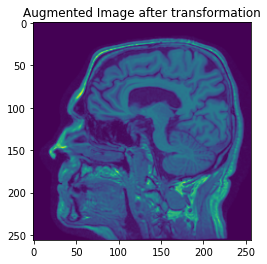

In [69]:
plt.title('Augmented Image after transformation')
plt.imshow(transformed_test_img_processed.permute(1,2,0))


## Image shape

In [6]:
hight, width, depth = [], [], []
for img in loop_images(img_path='../../data/raw/flattened/'):
    h, w, d = list(img.shape[1:])
    hight.append(h)
    width.append(w)
    depth.append(d)

In [7]:
df_size = pd.DataFrame(columns=['height', 'width','depth'], data={'height':hight, 'width':width, 'depth':depth})

In [8]:
df_size.head()

,height,width,depth
0,256,256,166
1,256,256,166
2,256,256,166
3,256,256,166
4,256,256,166


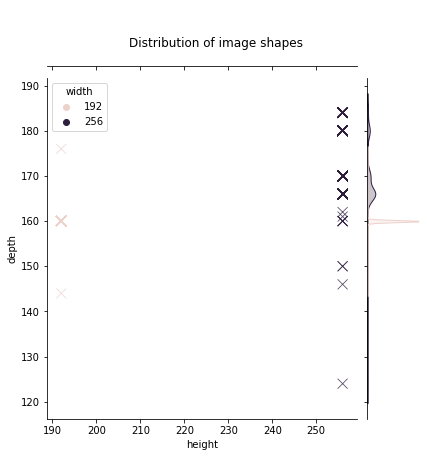

In [9]:
g = sns.jointplot(data = df_size, x='height', y='depth', hue='width', marker="x", s=100, alpha=.8)
#g.plot_joint(sns.kdeplot, color='black' , zorder=0, levels=6)
g.fig.suptitle("Distribution of image shapes")
g.fig.subplots_adjust(top=1.05)
plt.show()

## Grayscale distributions

0it [00:00, ?it/s]

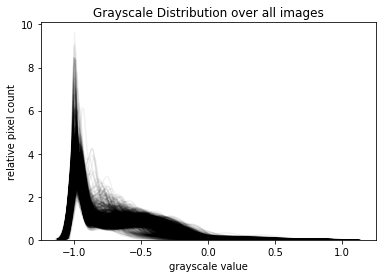

In [12]:
images = loop_images(img_path='../../data/raw/slices/center/3/')
for img in tqdm(images):
    data = img.numpy().flatten()
    
    g = sns.kdeplot(data=data, color='black', alpha = .05)
    
    del data, img


plt.title("Grayscale Distribution over all images")
plt.xlabel("grayscale value")
plt.ylabel("relative pixel count")
plt.show()

0it [00:00, ?it/s]

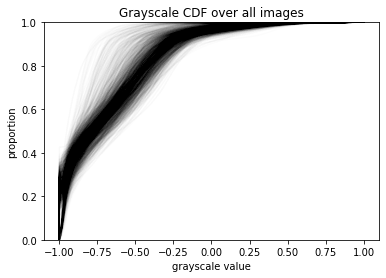

In [14]:
count = 0
for img in tqdm(loop_images(img_path='../../data/raw/slices/center/3/')):
    img = img.numpy().flatten()
    try:
        g = sns.ecdfplot(data=img, color='black', alpha = .01)
    except:
        continue
    count += 1
    del img

plt.title("Grayscale CDF over all images")
plt.xlabel("grayscale value")
plt.ylabel("proportion")
plt.show()

## Contrast

In [ ]:
stds = []
count = 0
for img in tqdm(loop_images(img_path=CONFIG['DATA_DIR_FLATTENED'])):
    img = np.array(img.convert('L')).flatten()
    stds.append(img.std())

In [ ]:
sns.boxplot(stds)
plt.title("RMS Contrast: Standard deviation for all images")
plt.xlabel("Std")
plt.ylabel("")
plt.show()

In [ ]:
micheals = []
count = 0
for img in tqdm(loop_images(img_path=CONFIG['DATA_DIR_FLATTENED'])):
    img = np.array(img.convert('L')).flatten()
    min = np.min(img)
    max = np.max(img)

    # compute contrast
    contrast = (max-min)/(max+min)
    micheals.append(contrast)

In [ ]:
sns.boxplot(micheals)
plt.title("RMS Contrast: Standard deviation for all images")
plt.xlabel("Std")
plt.ylabel("")
plt.show()